In [1]:
import cv2

import tensorflow as tf
import keras
import numpy as np
from matplotlib import patches

tf.__version__, keras.__version__

2024-02-07 13:35:26.679098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 13:35:26.679142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 13:35:26.680038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 13:35:26.685188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 13:35:27.579230: W tensorflow/compiler/tf2

('2.15.0', '3.0.0')

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-02-07 13:35:29.035449: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 13:35:29.070936: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 13:35:29.071465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
from utils.layers import PatchEmbedding, PatchMerging, SwinTransformer, WindowAttention

In [4]:
model = tf.keras.models.load_model('../models/swin.keras', custom_objects={
    'PatchEmbedding':PatchEmbedding, 
    'PatchMerging':PatchMerging,
    'SwinTransformer':SwinTransformer,
    'WindowAttention':WindowAttention,        
})
model.summary()

/home/main/.local/lib/python3.11/site-packages/keras/src/layers/layer.py:357: UserWarning: `build()` was called on layer 'patch_embedding_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
2024-02-07 13:35:29.101838: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 13:35:29.102401: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. S

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 4)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ patch_embedding_1               │ (None, 256, 64)           │     16,704 │
│ (PatchEmbedding)                │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ swin_transformer_2              │ (None, 256, 64)           │     50,072 │
│ (SwinTransformer)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ swin_transformer_3              │ (None, 256, 64)           │     51,096 │
│ (SwinTransformer)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ patch_merging_1 (PatchMerging)  │ (None, 64, 128)           │     32,768 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling1d_1      │ (None, 128)               │          0 │
│ (GlobalAveragePooling1D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_24 (Dense)                │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_25 (Dense)                │ (None, 512)               │    524,800 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_26 (Dense)                │ (None, 256)               │    131,328 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_27 (Dense)                │ (None, 33)                │      8,481 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,839,925 (10.84 MB)

 Trainable params: 946,289 (3.61 MB)

 Non-trainable params: 1,056 (8.25 KB)

 Optimizer params: 1,892,580 (7.22 MB)

(32, 32)


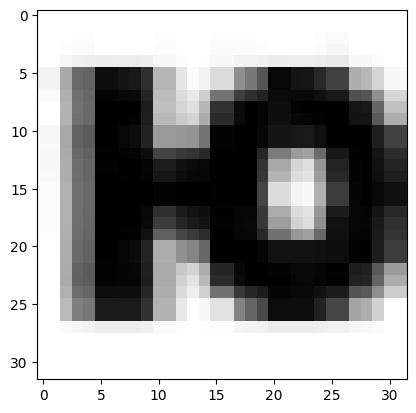

In [5]:
import cv2
import matplotlib.pyplot as plt

input_shape = (32,32,1)

let = cv2.imread('../data/letterlist.jpg', 0)
let = let[15:780,:]
num_letters = 33
num_fonts = 21


def crop_image(img, trashold=250):
    top = 0
    bottom =0
    left = 0
    right = 0
    for i in range(img.shape[0]):
        if img[i,:].mean() > trashold:
            top = i
        else:
            break
    for i in range(img.shape[0]):
        if img[-i,:].mean() > trashold:
            bottom = i
        else:
            break
    for i in range(img.shape[1]):
        if img[:,i].mean() > trashold:
            left = i
        else:
            break
    for i in range(img.shape[1]):
        if img[:,-i].mean() > trashold:
            right = i
        else:
            break
    left = max(1,left)
    right = max(1,right)
    top = max(1,top)
    bottom = max(1,bottom)
    img = img[top:-bottom, left:-right]

    return img

def get_letter(font_num, letter_num):
    img = let[let.shape[0]//num_fonts*(font_num-1):let.shape[0]//num_fonts*font_num,
           let.shape[1]//num_letters*(letter_num-1):let.shape[1]//num_letters*letter_num,
           ]
    img_croped = crop_image(img)    
    h,w = img_croped.shape    
    size_max = max(w, h)
    letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
    
    if w > h:
        # Enlarge image top-bottom
        # ------
        # ======
        # ------
        y_pos = size_max // 2 - h // 2
        letter_square[y_pos:y_pos + h, 0:w] = img_croped[:h, :w]
    elif w < h:
        # Enlarge image left-right
        # --||--
        x_pos = size_max // 2 - w // 2
        letter_square[0:h, x_pos:x_pos + w] = img_croped[:h, :w]
    else:
        letter_square = img_croped    

    return cv2.resize(letter_square, input_shape[:-1], interpolation=cv2.INTER_AREA)

def get_letter_variants(letter_num):
        return let[:,
           let.shape[1]//num_letters*(letter_num-1):let.shape[1]//num_letters*letter_num,
           ]

def get_font_variants(font_num):
    return let[let.shape[0]//num_fonts*(font_num-1):let.shape[0]//num_fonts*font_num,
           :,
           ]
test = get_letter(21,33)
print(test.shape)
plt.imshow(test, cmap='gray')

In [6]:
from utils.augmenters import *

images = []
captions = []
captions_base = "Ё Й Ц У К Е Н Г Ш Щ З Х Ъ Ф Ы В А П Р О Л Д Ж Э Я Ч С М И Т Ь Б Ю".split(' ')
for i in range(1, num_fonts+1):
    for j in range(1, num_letters+1):
        images.append(get_letter(i,j))
        captions.append(captions_base[j-1])

aug = MultipleAugmenter(images.copy(), captions.copy())
aug.random_augment(5, 65, 0)


x_data = np.array(aug.images)
x_data = x_data.reshape(*x_data.shape, 1)
classes = list(map(captions_base.index, aug.captions))
y_data = keras.utils.to_categorical(classes, num_classes=num_letters)


693
1099
1727
2788
4414


In [12]:
from utils.funcs import patch_extract

def augment(x):
    return x

batch_size = 32

dataset = (
    tf.data.Dataset.from_tensor_slices((x_data, y_data))
    .map(lambda x, y: (augment(x), y))
    .batch(batch_size=batch_size)
    .map(lambda x, y: (patch_extract(x), y))
    .prefetch(tf.data.experimental.AUTOTUNE)
)

2024-02-07 13:36:51.377662: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 57352192 exceeds 10% of free system memory.
2024-02-07 13:36:51.444192: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 57352192 exceeds 10% of free system memory.


In [8]:
model.load_weights('../models/swin.weights.h5')

In [9]:
model.evaluate(dataset)

2024-02-07 13:35:31.132306: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 57352192 exceeds 10% of free system memory.
2024-02-07 13:35:31.605981: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb0e800d330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-07 13:35:31.606044: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-02-07 13:35:31.640864: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-07 13:35:31.715521: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


 75/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0336 - loss: 12.4241 - top-5-accuracy: 0.1500

I0000 00:00:1707302132.373149    6469 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0353 - loss: 12.0858 - top-5-accuracy: 0.1495


[11.819454193115234, 0.03699471428990364, 0.1498357355594635]

In [10]:
data = []
for i in range(1,74):
    letter = cv2.imread(f'../test/letter{i}.jpg', 0)
    data.append(cv2.resize(letter, input_shape[:-1]))
plt.imshow(data[0], cmap='gray')

[ WARN:0@7.254] global loadsave.cpp:248 findDecoder imread_('../test/letter1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
data = np.array(data)/255
data = data[:,:,:, np.newaxis]
data.shape

In [56]:
from utils.funcs import patch_extract
from utils.word_split import *

size=10

words = [cv2.imread(f'../words/word{i}.jpg', 0) for i in range(1, 11)]

input_data = []
for word in words:
    input_data+=slicing_window_transform(word, 
                                         window_width_factor=0.6,
                                         window_step=0.5, 
                                         output_size=input_shape[0])
input_data = np.array(input_data)/255
input_data = input_data[:,:,:, np.newaxis]

dataset = (
    tf.data.Dataset.from_tensor_slices(input_data)
    .batch(batch_size=32)
    .map(lambda x: (patch_extract(x)))
    .prefetch(tf.data.experimental.AUTOTUNE)
)

Split to 1 images
Split to 4 images
Split to 17 images
Split to 26 images
Split to 12 images
Split to 10 images
Split to 11 images
Split to 15 images
Split to 13 images
Split to 1 images


In [57]:
pred = model.predict(dataset)
pred.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(110, 33)

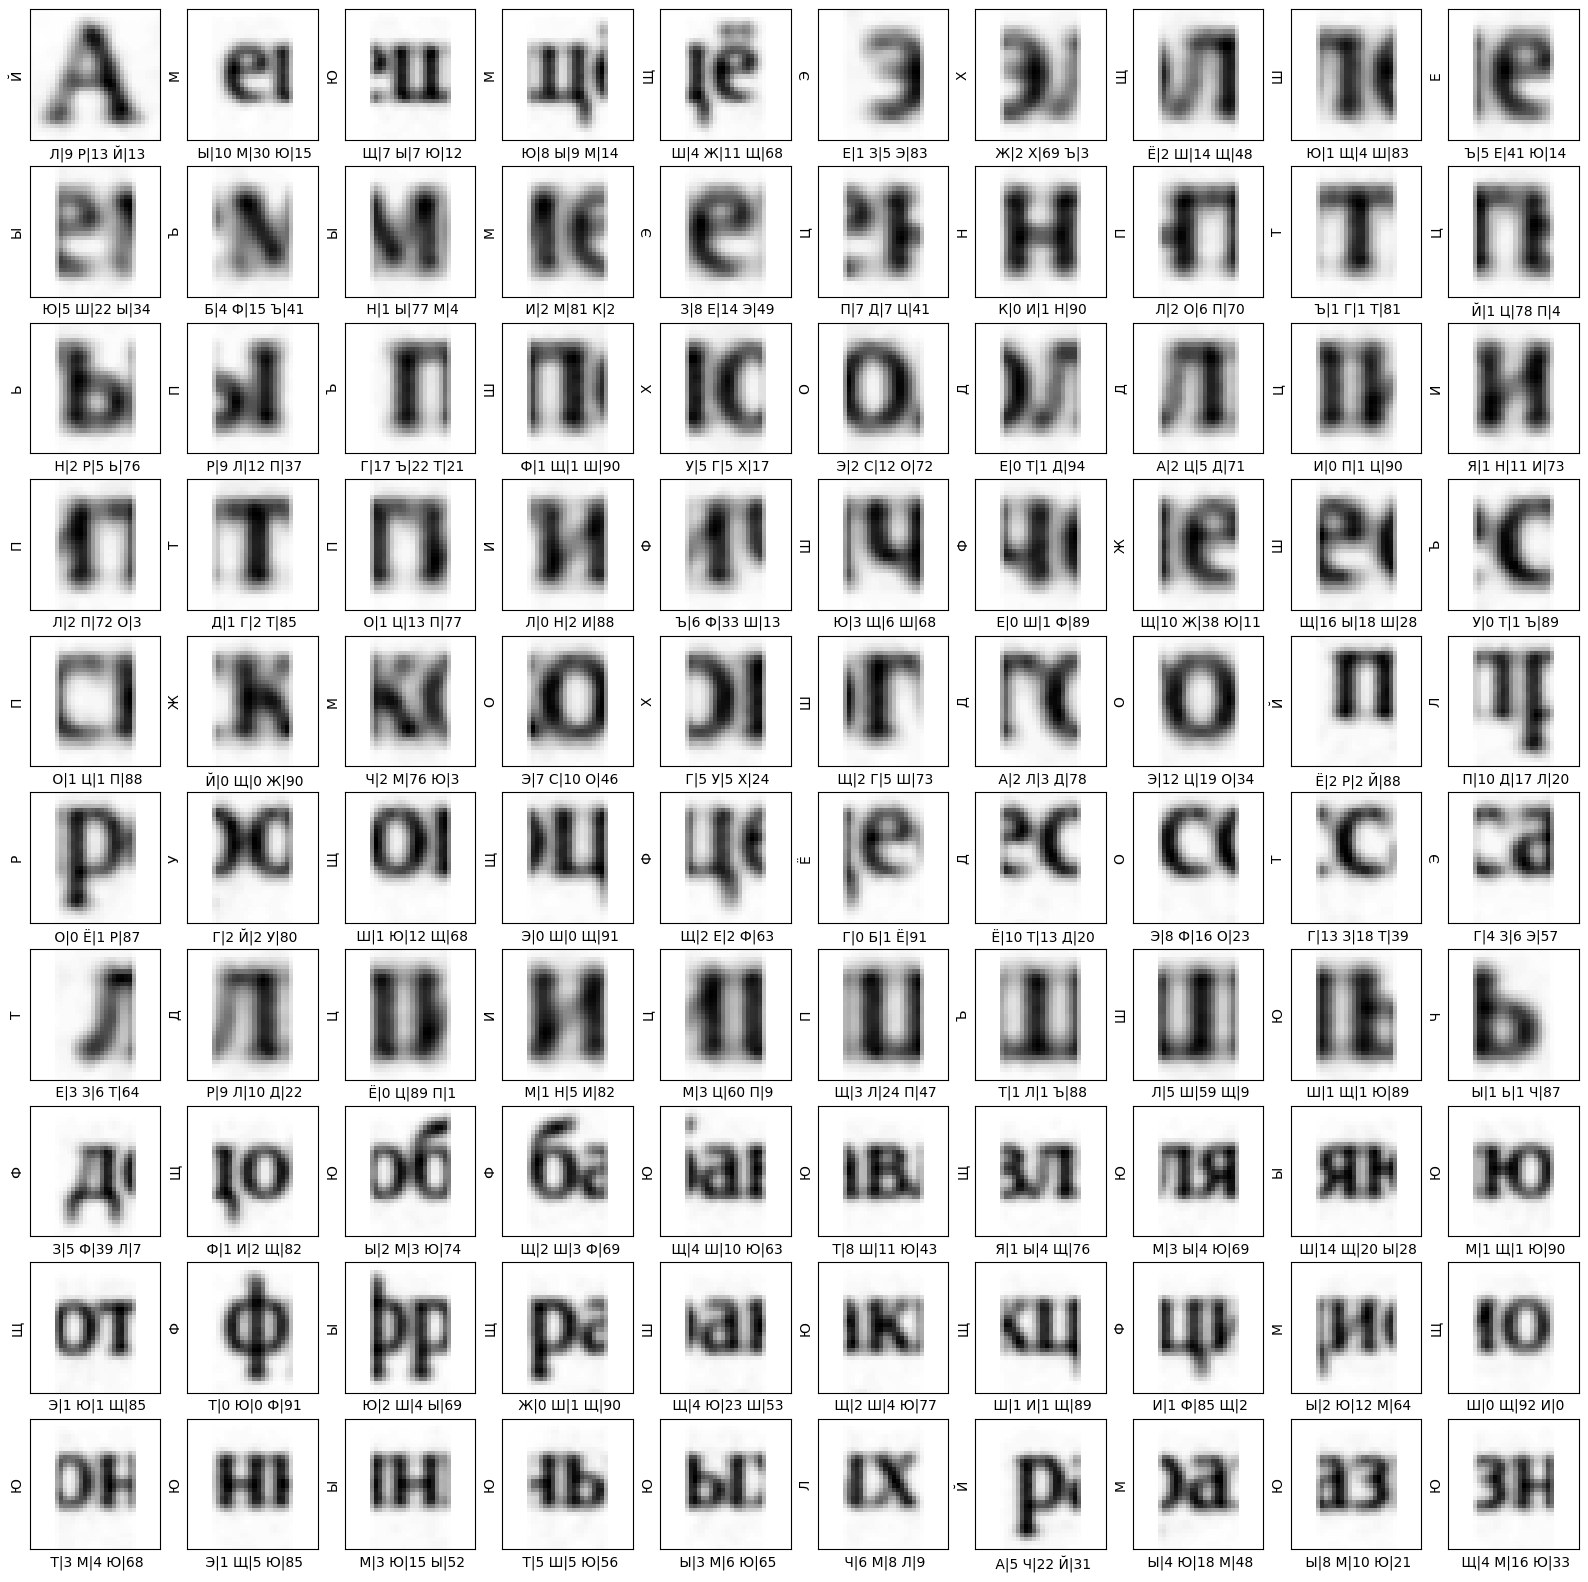

In [58]:
captions_base = "Ё Й Ц У К Е Н Г Ш Щ З Х Ъ Ф Ы В А П Р О Л Д Ж Э Я Ч С М И Т Ь Б Ю".split(' ')

def n_largest_indices_sorted(arr, n):
    indices = np.argpartition(arr, -n, axis=1)[:, -n:]
    return indices

captions = n_largest_indices_sorted(pred,3)
best = pred.argmax(axis=1)

fig, ax = plt.subplots(ncols=size, nrows=size, figsize=(20,20))
letters = input_data

for i in range(min(size**2,len(letters))):
    
    ax[i//size, i%size].set_xticks([])
    ax[i//size, i%size].set_yticks([])
    
    ax[i//size, i%size].imshow(letters[i], cmap='gray')
    
    pred_line = captions[i]
    
    lets = [captions_base[i] for i in pred_line]
    
    label = ''
    for j, let in enumerate(lets):
        label = label + f' {let}|{pred[i,pred_line[j]]*100:.0f}'
    
    ax[i//size, i%size].set_xlabel(label)
    ax[i//size, i%size].set_ylabel(captions_base[best[i]])

In [51]:
pred[0]

array([0.02248843, 0.1333378 , 0.01170808, 0.02335272, 0.0196765 ,
       0.04730962, 0.02890577, 0.02416814, 0.01337533, 0.0137463 ,
       0.01498743, 0.01416621, 0.01048679, 0.01651023, 0.0139002 ,
       0.01654313, 0.02181849, 0.03306705, 0.12635058, 0.0201399 ,
       0.08879915, 0.01777721, 0.01213509, 0.01672514, 0.07695336,
       0.02228118, 0.01588589, 0.01370674, 0.01824523, 0.02486835,
       0.04110877, 0.01421673, 0.01125843], dtype=float32)

In [14]:
model.evaluate(dataset)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0353 - loss: 12.0858 - top-5-accuracy: 0.1495


[11.819454193115234, 0.03699471428990364, 0.1498357355594635]

In [13]:
mat = np.zeros(shape=(num_letters,num_letters))
for i in range(len(pred.argmax(axis=1))):
    true_ind = y_data.argmax(axis=1)[i]
    pred_ind = pred.argmax(axis=1)[i]    
    mat[true_ind, pred_ind]+=1

mat=mat/mat.sum(axis=0)

fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(mat, cmap='Blues')
ax.set_xticks(range(len(captions_base)), captions_base)
ax.set_yticks(range(len(captions_base)), captions_base)
for i in range(len(captions_base)):
    for j in range(len(captions_base)):
        c = mat[j,i]
        ax.text(i, j, f'{c:.2f}', va='center', ha='center')
ax.set_xlabel('True letters', fontsize=15)
ax.set_ylabel('Predicted letters', fontsize=15)

NameError: name 'pred' is not defined